In [155]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans

In [156]:
sns.set_style('darkgrid')
plt.style.use('ggplot')

In [157]:
data_1=pd.read_csv('Seedstars IRS alumni data analysis - Anonymised.xlsx - pasted values only.csv')
data_1.head()

,company_id,event_name,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,...,Unnamed: 80,Unnamed: 81,Unnamed: 82,WEBSITE DEAD?,Unnamed: 84,Unnamed: 85,Funding after the event?,FUNDING - ALL FROM 3RD PARTY,total funding,age at the time of final funding (in months)
0,1,Seedstars Tashkent,Uzbekistan,Consumer Services,Revenue Stage,0.0,2017-09,36.0,4.0,0.0,...,NaN,NaN,NaN,Alive,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Seedstars Shanghai,China,Sports,Pre-Revenue Stage,1.0,2017-02,43.0,7.0,0.0,...,NaN,NaN,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Seedstars Maputo,Mozambique,Education,Beta Testing Stage,1.0,2015-11,58.0,3.0,0.0,...,NaN,NaN,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Seedstars Vicente Lopez,Argentina,Industrial / Energy / Clean Tech,Expansion Stage,1.0,2016-03,54.0,3.0,0.0,...,NaN,NaN,NaN,Dead,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Seedstars Dhaka,Bangladesh,Education,Revenue Stage,1.0,2015-05,64.0,2.0,0.0,...,NaN,NaN,NaN,Alive,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
data_1.shape

(4255, 90)

In [159]:
total_features=data_1.shape[1]
num_features=len((data_1.select_dtypes(include=np.number)).columns.tolist())
cat_features=total_features-num_features
print(' categorical features: ', cat_features)
print(' numerircal features: ', num_features)

 categorical features:  37
 numerircal features:  53


In [160]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 90 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   company_id                                                                              4255 non-null   int64  
 1   event_name                                                                              4237 non-null   object 
 2   country                                                                                 4242 non-null   object 
 3   industry                                                                                4133 non-null   object 
 4   business_stage                                                                          3560 non-null   object 
 5   incorporated                                                         

<AxesSubplot:ylabel='WEBSITE DEAD?'>

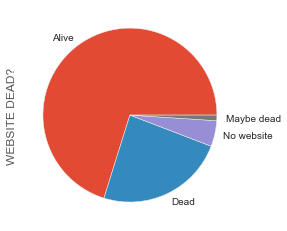

In [161]:
data_1['WEBSITE DEAD?'].value_counts().plot.pie()
#sns.countplot('WEBSITE DEAD?', data=data_1)


In [165]:
#(data_1['WEBSITE DEAD?'].value_counts()/data_1.shape[0])*100
data_1['WEBSITE DEAD?'].value_counts()/4211

Alive         0.709095
Dead          0.242460
No website    0.048445
Maybe dead    0.010449
Name: WEBSITE DEAD?, dtype: float64

In [166]:
#data['PotentialFraud'].replace(['No', 'Yes'], [0,1], inplace=True)
#data_1['WEBSITE DEAD?'].value_counts()/4211
data_1['WEBSITE DEAD?'] = data_1['WEBSITE DEAD?'].replace(['Alive', 'Dead', 'No website', 'Maybe dead'], [1,0,-1,np.random.choice([1,0,-1], p=[0.709095, 0.242460, 0.048445])])

In [167]:
data_1['WEBSITE DEAD?'].value_counts()

 1    3030
 0    1021
-1     204
Name: WEBSITE DEAD?, dtype: int64

## I- First Step: Working with Numerical Features

In [182]:
num_data = data_1.select_dtypes(include=np.number)
num_data.shape

(4255, 54)

In [183]:
k=['Unnamed: 63',
 'Unnamed: 64',
 'Unnamed: 65',
 'Unnamed: 66',
 'Unnamed: 73',
 'Unnamed: 74',
 'Unnamed: 75',
 'Unnamed: 76',
 'Unnamed: 78',
 'Unnamed: 80',
 'Unnamed: 81',
 'Unnamed: 82','Unnamed: 84',
 'Unnamed: 85', 'total funding', 'age at the time of final funding (in months)']

In [184]:
for i in k:
    num_data.drop(i, axis=1, inplace=True)

In [187]:
num_data.columns.tolist()

['company_id',
 'incorporated',
 'Age today',
 'Number of team members',
 'revenue_model_commission',
 'revenue_model_product',
 'revenue_model_on-demand',
 'revenue_model_subscription',
 'revenue_model_freemium',
 'revenue_model_advertising',
 'revenue_model_licensing',
 'customer_type - B-to-B-to-C',
 'customer_type - B-to-B',
 'customer_type - B-to-C',
 'customer_type - B-to-G',
 'customer_interaction - web',
 'customer_interaction - mobile',
 'customer_interaction - physical',
 'accelerator',
 'number_employees',
 'users_1month',
 'users_2month',
 'users_3month',
 'paying_users_1month',
 'paying_users_2month',
 'paying_users_3month',
 'number_transactions_1month',
 'number_transactions_2month',
 'number_transactions_3month',
 'number of competitors',
 'gender_0',
 'Age of the entrepreneur 0',
 'gender_1',
 'Age of the entrepreneur 1',
 'gender_2',
 'Age of the entrepreneur 2',
 'company_logo',
 'WEBSITE DEAD?']

### 1- Missing Values Ablation by sampling from the distribution

/Users/christian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_transactions_3month'>

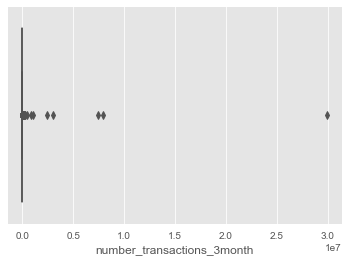

In [191]:
sns.boxplot(num_data['number_transactions_3month'])

In [185]:
#num_data.head()
for i in num_data.columns.tolist():
    if i!='WEBSITE DEAD?':
        l = num_data[i].dropna()
        value_dict = {}
        for el in l:
            if el in value_dict :
                value_dict[el] += 1
            else:
                value_dict[el] =1
        keys = list(value_dict.keys())
        values = list(value_dict.values())
        prob_values = [i/np.sum(values) for i in values]
        num_data[i].fillna(value=np.random.choice(a=keys, p=prob_values), inplace=True)

In [192]:
#num_data.info()

<AxesSubplot:>

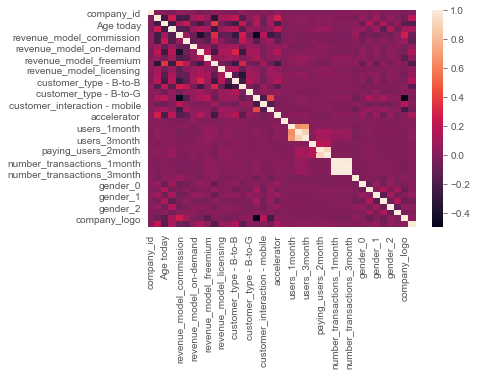

In [193]:
sns.heatmap(num_data.corr())

### 2- TSNE Dimensionality Reduction

In [194]:
num_data.shape

(4255, 38)

Some features present a negligibe number of outlier as depicted in boxplot that we can delet

In [195]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [196]:
num_data=clean_dataset(num_data)

<ipython-input-195-19e362bcb334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [197]:
scaler = StandardScaler()
# isomap = Isomap()
# isomap_data = isomap.fit_transform(scaler.fit_transform(num_data))

tsne = TSNE()
tsne_data = tsne.fit_transform(scaler.fit_transform(num_data))

No handles with labels found to put in legend.


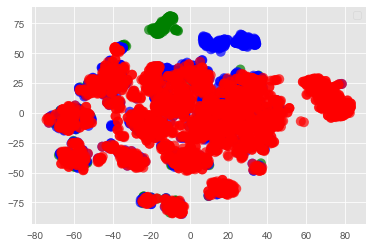

In [199]:
i = -1
for color in ['green', 'blue', 'red']:
    plt.scatter(tsne_data[num_data['WEBSITE DEAD?'] == i][:,0], tsne_data[num_data['WEBSITE DEAD?'] == i][:,1], c=color, s=100,
               alpha=0.7, edgecolors='none')
    i+=1
plt.legend() 

### 3- KMeans Clustering (Baseline)

In [200]:
from sklearn.cluster import KMeans
kmean = KMeans(2)
kmean_data = kmean.fit(normalize(num_data))

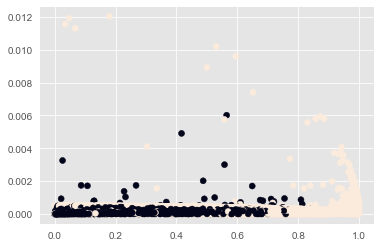

In [201]:
plt.scatter(normalize(num_data)[:, 0], normalize(num_data)[:, 1], c=kmean_data.labels_)

In [202]:
sum(kmean_data.labels_ == num_data['WEBSITE DEAD?'])

2540

In [203]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(num_data['WEBSITE DEAD?'],kmean.labels_)

array([[   0,    7,  197],
       [   0,  139,  882],
       [   0,  629, 2401]])

In [204]:
print(classification_report(num_data['WEBSITE DEAD?'], kmean.labels_))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       204
         0.0       0.18      0.14      0.15      1021
         1.0       0.69      0.79      0.74      3030

    accuracy                           0.60      4255
   macro avg       0.29      0.31      0.30      4255
weighted avg       0.53      0.60      0.56      4255



/Users/christian/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4- Modeling

Our models will take as input the results from the TSNE transformation, a 2D dataset.

In [205]:
X = tsne_data
y = num_data['WEBSITE DEAD?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, shuffle=True, random_state=123)

In [206]:
rf_clf = RandomForestClassifier()
svm_clf = SVC()
logr_clf = LogisticRegressionCV(max_iter=1000)
gb_clf = GradientBoostingClassifier()
adb_clf = AdaBoostClassifier()
dt_clf = DecisionTreeClassifier()

for name, model in zip(['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boost', 'AdaBoost', 'Decision Tree'],
                       [rf_clf, svm_clf, logr_clf, gb_clf, adb_clf,dt_clf]):
    print('\t',name.upper(),':')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

	 RANDOM FOREST :
Accuracy:  0.863849765258216
              precision    recall  f1-score   support

        -1.0       1.00      0.62      0.77        16
         0.0       0.77      0.58      0.66        95
         1.0       0.88      0.96      0.92       315

    accuracy                           0.86       426
   macro avg       0.88      0.72      0.78       426
weighted avg       0.86      0.86      0.86       426

	 SVM :
Accuracy:  0.8004694835680751
              precision    recall  f1-score   support

        -1.0       1.00      0.44      0.61        16
         0.0       1.00      0.20      0.33        95
         1.0       0.79      1.00      0.88       315

    accuracy                           0.80       426
   macro avg       0.93      0.55      0.61       426
weighted avg       0.84      0.80      0.75       426

	 LOGISTIC REGRESSION :
Accuracy:  0.7535211267605634
              precision    recall  f1-score   support

        -1.0       1.00      0.31      0.48 

/Users/christian/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
vot_clf = VotingClassifier(estimators=[('rf', rf_clf),('gb', gb_clf),('dt',dt_clf)], voting='hard')
vot_clf.fit(X_train, y_train)
y_pred = vot_clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8450704225352113
              precision    recall  f1-score   support

        -1.0       0.90      0.56      0.69        16
         0.0       0.74      0.54      0.62        95
         1.0       0.86      0.95      0.91       315

    accuracy                           0.85       426
   macro avg       0.83      0.68      0.74       426
weighted avg       0.84      0.85      0.83       426



## II- Second Step: Working with Numerical and categorical Features